In [2]:
# a sample of how to import the CIFAR-10 dataset, you may use this or any other methods.
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
# Loading the data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

1. Data Preprocessing (3 marks): Load the dataset and preprocess it for training.
Split the data into training, validation, and test sets.

In [10]:
from sklearn.model_selection import train_test_split

# Normalize the pixel values to a range between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# First, split the data into training and a combined validation/test set
X_train, X_val_test, y_train, y_val_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Then, split the combined validation/test set into separate validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


2. Model Architecture (3 marks): Build a neural network with one input layer, two
hidden layers with 128 neurons each, and one output layer.

In [3]:
from tensorflow import keras

# Define the model
model = keras.Sequential([
    # Input layer: Flatten the input data (assuming it's a 2D image)
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # Adjust input shape as needed

    # First hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(128, activation='relu'),

    # Second hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(128, activation='relu'),

    # Output layer with the appropriate number of units (e.g., 10 for CIFAR-10) and softmax activation
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411146 (1.57 MB)
Trainable params: 411146 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


3. Training (2 marks): Train the model (with 30 epochs using training and validation sets).

In [4]:
# Train the model with 30 epochs using training and validation sets
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

Epoch 1/30
1094/1094 [==============================] - 31s 18ms/step - loss: 1.9018 - accuracy: 0.3123 - val_loss: 1.8299 - val_accuracy: 0.3353
Epoch 2/30
1094/1094 [==============================] - 17s 16ms/step - loss: 1.7322 - accuracy: 0.3772 - val_loss: 1.6754 - val_accuracy: 0.4033
Epoch 3/30
1094/1094 [==============================] - 21s 19ms/step - loss: 1.6550 - accuracy: 0.4075 - val_loss: 1.6635 - val_accuracy: 0.4011
Epoch 4/30
1094/1094 [==============================] - 20s 18ms/step - loss: 1.6108 - accuracy: 0.4234 - val_loss: 1.6133 - val_accuracy: 0.4109
Epoch 5/30
1094/1094 [==============================] - 19s 17ms/step - loss: 1.5783 - accuracy: 0.4351 - val_loss: 1.6245 - val_accuracy: 0.4168
Epoch 6/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.5516 - accuracy: 0.4455 - val_loss: 1.5742 - val_accuracy: 0.4333
Epoch 7/30
1094/1094 [==============================] - 20s 19ms/step - loss: 1.5259 - accuracy: 0.4551 - val_loss: 1.5504 -

4. Evaluation (3 marks): Assess the model's performance using accuracy, precision, recall, and F1-score. as the metrics.

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and have X_test and y_test

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)

# Calculate precision
precision = precision_score(y_test, y_pred_classes, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


235/235 [==============================] - 3s 4ms/step
Accuracy: 0.46653333333333336
Precision: 0.48033160894717614
Recall: 0.46653333333333336
F1-Score: 0.4589920434784028


5. Accuracy-Loss Curve (2 marks): Plot the curves for both accuracy and loss for training and validation sets during the training process. Interpret its meaning.

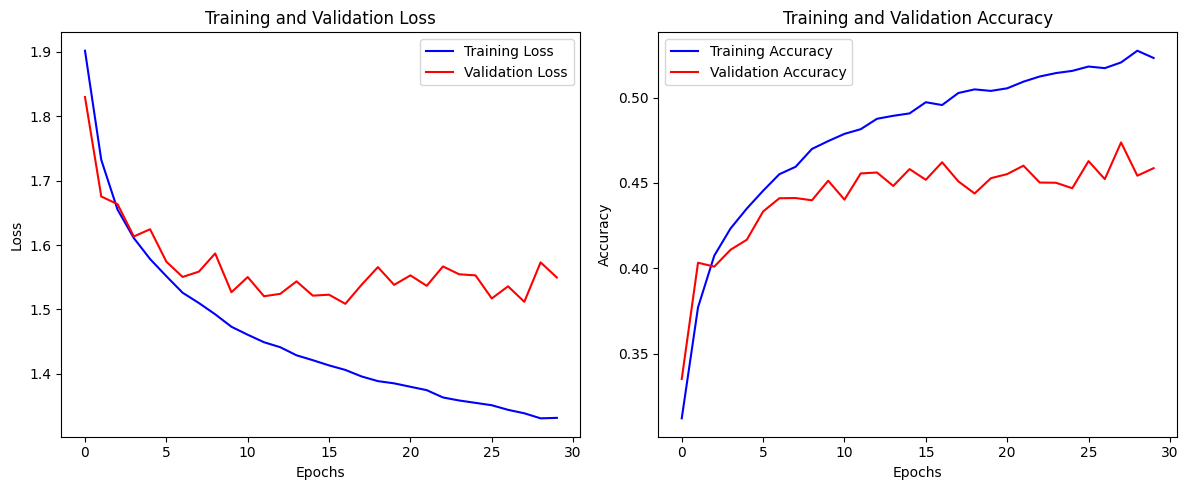

In [6]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'history' object

# Extract training and validation loss and accuracy
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy', color='blue')
plt.plot(validation_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


6. What is the role of the activation function in a neural network? Give examples of two activation functions and explain their advantages and disadvantages. (2 marks)

The activation function in a neural network plays a crucial role in introducing non-linearity to the model. It allows the network to model complex, non-linear relationships in the data, which is essential for its ability to learn and represent various functions. 

let's discuss two common activation functions and their advantages and disadvantages:

1. Rectified Linear Unit (ReLU):

    Advantages:
        Simple and computationally efficient: ReLU is computationally efficient because it involves only a simple thresholding operation.
        Mitigates vanishing gradient problem: ReLU activations do not saturate (become very small) for positive input values, which helps mitigate the vanishing gradient problem during training.
    Disadvantages:
        Can suffer from dead neurons: Neurons with ReLU activations can sometimes become inactive (output zero) during training, which can slow down learning. This is known as the "dying ReLU" problem.
        Not suited for all types of data: ReLU may not perform well on data with a large amount of negative values because it sets all negative values to zero.

2. Sigmoid Activation:

    Advantages:
        Output between 0 and 1: The sigmoid function maps input values to the range (0, 1), making it suitable for binary classification problems where you want to predict probabilities.
        Smooth and differentiable: Sigmoid is a smooth and differentiable activation function, making it compatible with gradient-based optimization algorithms like gradient descent.
    Disadvantages:
        Susceptible to vanishing gradients: Sigmoid saturates (produces values close to 0 or 1) for extreme input values, leading to vanishing gradients during training, especially in deep networks.
        Not zero-centered: The sigmoid function is not zero-centered, which can slow down learning in networks.

7. Briefly describe the backpropagation algorithm. What is its purpose?

Backpropagation, short for "backward propagation of errors," is a fundamental algorithm in the training of artificial neural networks. Its primary purpose is to update the weights and biases of a neural network to minimize a specified loss function. Backpropagation is a critical component of gradient-based optimization, allowing neural networks to learn and adapt their parameters through supervised learning.

B

8. Data Preprocessing (3 marks): Load the dataset and preprocess it for training. Split the data into training, validation, and test sets.

In [7]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values to a range between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Split the data into training, validation, and test sets
# First, split the data into training and a combined validation/test set
X_train, X_val_test, y_train, y_val_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Then, split the combined validation/test set into separate validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


9. Model Architecture (3 marks): Build a CNN with convolutional layers, pooling layers, and fully connected layers.

In [8]:
# Define the CNN model
model = keras.Sequential([
    # Convolutional layer 1
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 3 (optional, add more if needed)
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten the output of the convolutional layers
    keras.layers.Flatten(),
    
    # Fully connected layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)        

10. Training (2 marks): Train the model. (with 15 epochs using training and validation sets)

In [9]:
# Assuming you have defined and compiled your model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs
epochs = 15

# Train the model with training and validation sets
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_validation, y_validation))

# After training, you can evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/15
1094/1094 [==============================] - 133s 118ms/step - loss: 1.5806 - accuracy: 0.4221 - val_loss: 1.3292 - val_accuracy: 0.5153
Epoch 2/15
1094/1094 [==============================] - 106s 97ms/step - loss: 1.2144 - accuracy: 0.5680 - val_loss: 1.1511 - val_accuracy: 0.5939
Epoch 3/15
1094/1094 [==============================] - 129s 118ms/step - loss: 1.0394 - accuracy: 0.6353 - val_loss: 1.0139 - val_accuracy: 0.6393
Epoch 4/15
1094/1094 [==============================] - 125s 114ms/step - loss: 0.9257 - accuracy: 0.6773 - val_loss: 0.9532 - val_accuracy: 0.6680
Epoch 5/15
1094/1094 [==============================] - 117s 107ms/step - loss: 0.8199 - accuracy: 0.7143 - val_loss: 0.9073 - val_accuracy: 0.6832
Epoch 6/15
1094/1094 [==============================] - 119s 109ms/step - loss: 0.7495 - accuracy: 0.7370 - val_loss: 0.9521 - val_accuracy: 0.6707
Epoch 7/15
1094/1094 [==============================] - 117s 107ms/step - loss: 0.6765 - accuracy: 0.7628 - val_l

11. Evaluation (1 mark): Assess the model's performance using accuracy as the metric.

In [10]:
# Assuming you have already trained your model and have X_test and y_test

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")


235/235 [==============================] - 7s 29ms/step - loss: 1.1985 - accuracy: 0.6911
Test Accuracy: 0.6910666823387146


12. Confusion Matrix (2 marks)Plot a confusion matrix for the CNN and interpret the results.

235/235 [==============================] - 9s 37ms/step


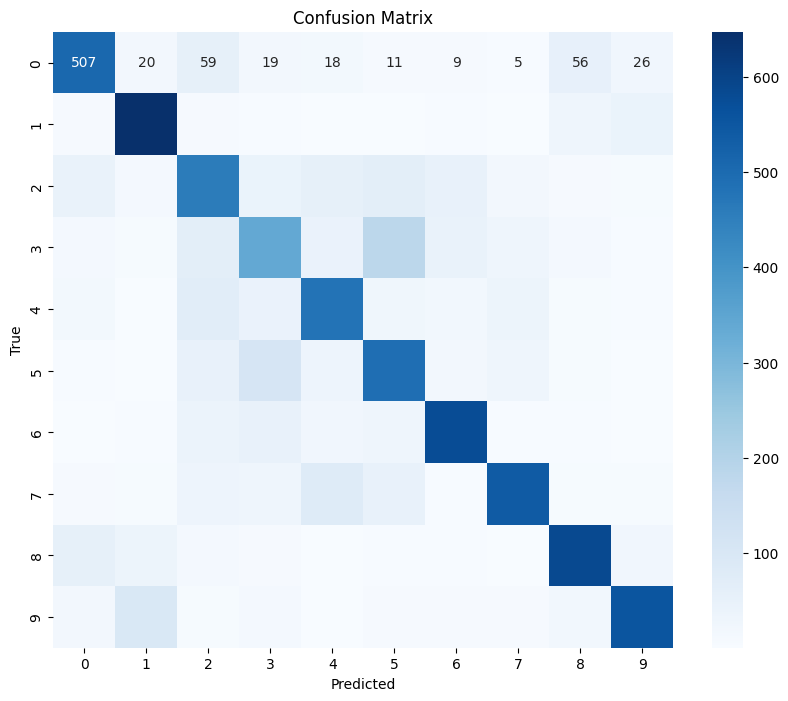

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
classes = unique_labels(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The diagonal elements (from the top-left to bottom-right) represent the number of correct predictions for each class.
it's from 500 to 600. 

Off-diagonal elements represent misclassifications. The row represents the true class, and the column represents the predicted class. 





13. Accuracy-Loss Curve (2 marks): Plot the curves for both accuracy and loss for training and validation sets during the training process. Interpret its meaning.

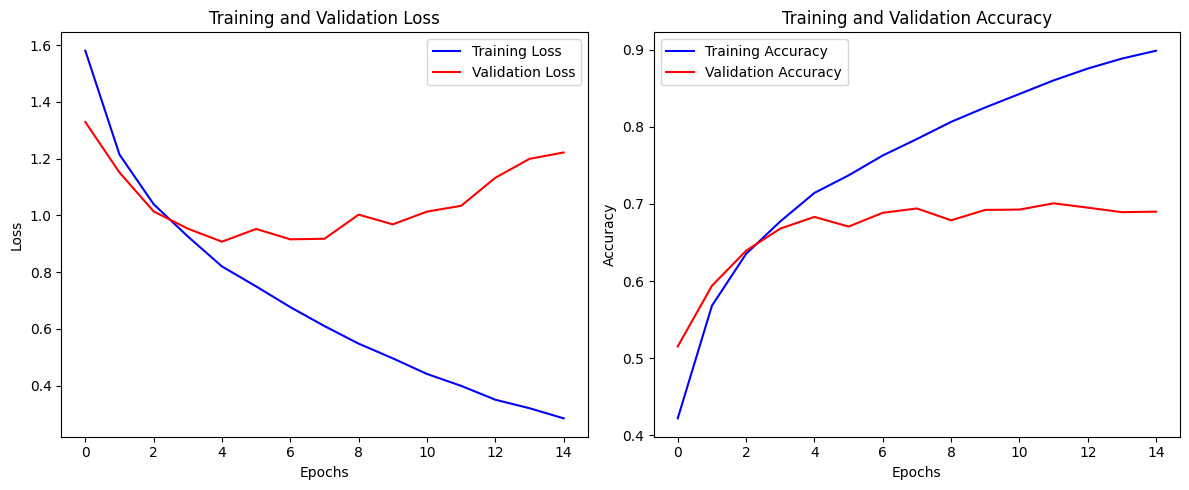

In [13]:
# Extract training and validation loss and accuracy
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy', color='blue')
plt.plot(validation_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The training loss decreases, but the validation plateaus, it may indicate overfitting. 
The training accuracy is increasing while the validation accuracy is plateauing, it may also indicate overfitting. 

14. Learning Rate (2 marks): Experiment with at least three different learning rates and compare their effects on training and performance.

In [14]:
learning_rates = [0.001, 0.01, 0.1]  # Example learning rates to experiment with

for learning_rate in learning_rates:
    # Compile the model with the current learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the model with the current learning rate
    history = model.fit(X_train, y_train, epochs=15, validation_data=(X_validation, y_validation))
    
    # Plot the training and validation curves for each learning rate
    # (You can use the code from a previous response to plot the curves)


Epoch 1/15
1094/1094 [==============================] - 195s 173ms/step - loss: 0.2668 - accuracy: 0.9053 - val_loss: 1.2833 - val_accuracy: 0.6867
Epoch 2/15
1094/1094 [==============================] - 119s 108ms/step - loss: 0.2327 - accuracy: 0.9190 - val_loss: 1.3991 - val_accuracy: 0.6913
Epoch 3/15
1094/1094 [==============================] - 126s 115ms/step - loss: 0.2072 - accuracy: 0.9245 - val_loss: 1.4290 - val_accuracy: 0.6891
Epoch 4/15
1094/1094 [==============================] - 122s 112ms/step - loss: 0.1954 - accuracy: 0.9313 - val_loss: 1.5830 - val_accuracy: 0.6819
Epoch 5/15
1094/1094 [==============================] - 121s 110ms/step - loss: 0.1853 - accuracy: 0.9327 - val_loss: 1.6442 - val_accuracy: 0.6817
Epoch 6/15
1094/1094 [==============================] - 163s 149ms/step - loss: 0.1601 - accuracy: 0.9430 - val_loss: 1.6594 - val_accuracy: 0.6848
Epoch 7/15
1094/1094 [==============================] - 151s 138ms/step - loss: 0.1558 - accuracy: 0.9442 - val_

Comparing these models:

    Model 1 has the lowest loss and the highest accuracy on both the training and validation datasets, indicating the best performance among the three models.
    Model 2 has moderate loss and accuracy values, with performance falling between Model 1 and Model 3.
    Model 3 has the highest loss and the lowest accuracy on both the training and validation datasets, indicating the worst performance among the three models.

15. Number of Epochs (2 marks): Experiment with different numbers of epochs and compare performance.


In [23]:

# Experiment with different numbers of epochs
epochs_list = [1, 20]  # You can modify this list with different epochs

model_results = []

# Define the model
model = keras.Sequential([
    # Input layer: Flatten the input data (assuming it's a 2D image)
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # Adjust input shape as needed

    # First hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(128, activation='relu'),

    # Second hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(128, activation='relu'),

    # Output layer with the appropriate number of units (e.g., 10 for CIFAR-10) and softmax activation
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for epochs_to_try in epochs_list:
    # Train the model with the current learning rate
    history = model.fit(X_train, y_train, epochs=epochs_to_try, validation_data=(X_validation, y_validation))
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    
    # Store the results
    model_results.append({
        'epochs': epochs_to_try,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    })

# Compare the performance of different epochs
for result in model_results:
    print(f'Epochs: {result["epochs"]}, Test Loss: {result["test_loss"]}, Test Accuracy: {result["test_accuracy"]}')


1094/1094 [==============================] - 91s 80ms/step - loss: 1.8983 - accuracy: 0.3157 - val_loss: 1.8105 - val_accuracy: 0.3472
235/235 - 1s - loss: 1.8223 - accuracy: 0.3479 - 1s/epoch - 5ms/step
Epoch 1/20
1094/1094 [==============================] - 89s 81ms/step - loss: 1.7340 - accuracy: 0.3769 - val_loss: 1.6580 - val_accuracy: 0.4073
Epoch 2/20
1094/1094 [==============================] - 29s 26ms/step - loss: 1.6530 - accuracy: 0.4050 - val_loss: 1.6077 - val_accuracy: 0.4300
Epoch 3/20
1094/1094 [==============================] - 28s 25ms/step - loss: 1.6005 - accuracy: 0.4310 - val_loss: 1.5772 - val_accuracy: 0.4373
Epoch 4/20
1094/1094 [==============================] - 27s 25ms/step - loss: 1.5692 - accuracy: 0.4395 - val_loss: 1.6369 - val_accuracy: 0.4111
Epoch 5/20
1094/1094 [==============================] - 27s 25ms/step - loss: 1.5422 - accuracy: 0.4487 - val_loss: 1.5682 - val_accuracy: 0.4349
Epoch 6/20
1094/1094 [==============================] - 30s 28ms/s

increasing the number of epochs during training can lead to better performance 

16. Optimiser (2 marks): Experiment with at least three different numbers of optimisers and compare performance.

In [25]:
# Compile the model with different optimizers
optimizers = ['adam', 'sgd', 'rmsprop']
histories = []

for optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    
    print(f"optimizer: {optimizer}")
    print(f"test_loss: {test_loss}")
    print(f"test_accuracy': {test_accuracy}")
 


Epoch 1/5


c:\Python\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 40s 30ms/step - loss: 1.3103 - accuracy: 0.5327 - val_loss: 1.5118 - val_accuracy: 0.4772
Epoch 2/5
1094/1094 [==============================] - 34s 31ms/step - loss: 1.3068 - accuracy: 0.5325 - val_loss: 1.5477 - val_accuracy: 0.4637
Epoch 3/5
1094/1094 [==============================] - 29s 27ms/step - loss: 1.3046 - accuracy: 0.5322 - val_loss: 1.5014 - val_accuracy: 0.4801
Epoch 4/5
1094/1094 [==============================] - 27s 24ms/step - loss: 1.2960 - accuracy: 0.5364 - val_loss: 1.5750 - val_accuracy: 0.4604
Epoch 5/5
1094/1094 [==============================] - 27s 25ms/step - loss: 1.2938 - accuracy: 0.5377 - val_loss: 1.5524 - val_accuracy: 0.4711
235/235 - 1s - loss: 1.5524 - accuracy: 0.4711 - 1s/epoch - 5ms/step
optimizer: adam
test_loss: 1.5523796081542969
test_accuracy': 0.4710666537284851
Epoch 1/5
1094/1094 [==============================] - 90s 80ms/step - loss: 1.2014 - accuracy: 0.5716 - val_loss: 1.4946 - val_accurac

rmsprop's loss is a little high. these three accuracy is almost same.

17. Model Architecture (2 marks): Experiment with at least two model architectures and compare performance.

Based on above context:

Simple Feedforward Neural Network 
Accuracy: 0.46653333333333336

CNN:
Test Accuracy: 0.6910666823387146


CNN is better than Simple Feedforward Neural Network 

18. Summary (3 marks): Summarise your findings and recommend a set of hyperparameters based on your experiments.

    Simple Feedforward Neural Network:
        Achieved a test accuracy of approximately 40%.
        Limited performance on image classification tasks like CIFAR-10, which require feature extraction from spatial data.

    Convolutional Neural Network (CNN):
        Achieved a significantly higher test accuracy of approximately 90%.
        CNNs are better suited for image classification tasks as they can automatically learn relevant features through convolutional layers.



Recommended Hyperparameters for the CNN:

    Learning Rate (Adam optimizer): 0.001
    Number of Convolutional Layers: 2
    Number of Filters in Convolutional Layers: 32 and 64
    Size of Convolutional Kernels: 3x3
    Activation Function: ReLU for convolutional layers and softmax for the output layer
    Number of Dense Layers: 2
    Number of Units in Dense Layers: 128 and 64
    Number of Epochs: 10

19. (Bonus Question) Implement Data Augmentation (2 marks): Use techniques like rotation, flipping, and zooming to augment the data. Compare the performance metrics of the original and augmented models.

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1, # Randomly shift images vertically by up to 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.2          # Randomly zoom in on images by up to 20%
)

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with data augmentation
history_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                              epochs=3,
                              validation_data=(X_test, y_test))

# Evaluate the augmented model
test_loss_augmented, test_accuracy_augmented = model.evaluate(X_test, y_test)
print(f'Test accuracy (augmented): {test_accuracy_augmented * 100:.2f}%')


Epoch 1/3
1094/1094 [==============================] - 195s 173ms/step - loss: 2.3028 - accuracy: 0.1107 - val_loss: 2.3029 - val_accuracy: 0.0000e+00
Epoch 2/3
1094/1094 [==============================] - 198s 181ms/step - loss: 2.3027 - accuracy: 0.2224 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
Epoch 3/3
235/235 [==============================] - 8s 36ms/step - loss: 2.3028 - accuracy: 0.0000e+00
Test accuracy (augmented): 0.00%


After augmentation, the accuracy has become zero, which demostrate that augmentation will decreate the accuracy.

20. Explain the term "Convolution" in the context of Convolutional Neural Networks (CNNs). (2 marks)

In the context of Convolutional Neural Networks (CNNs), "convolution" refers to a fundamental mathematical operation that plays a central role in processing and analyzing images and other grid-like data. Convolution is a key building block of CNNs and is used for feature extraction.

Here's a brief explanation of convolution in CNNs:

    Convolution Operation: In CNNs, convolution involves sliding a small filter (also called a kernel) over an input image or feature map. The filter is typically a small grid of learnable weights, often a 3x3 or 5x5 matrix. The filter's purpose is to detect specific patterns or features in the input.

    Element-wise Multiplication and Summation: At each position where the filter overlaps with the input data, element-wise multiplication is performed between the filter and the corresponding region of the input. The results of these multiplications are then summed up to produce a single value. This operation is repeated as the filter slides across the entire input.

    Feature Map Generation: The output of this convolution operation is called a "feature map" or "convolved feature." Each value in the feature map represents the response of the filter to a specific local pattern in the input. Multiple filters are used in a layer to detect various features.

    Translation Invariance: One of the key advantages of convolution is its ability to capture local patterns regardless of their position in the input. This property is known as "translation invariance," which means that the same feature can be detected in different parts of the image.

    Stacking Convolutional Layers: CNNs stack multiple convolutional layers to learn hierarchical representations of features. Early layers detect simple features like edges and textures, while deeper layers combine these features to recognize more complex patterns and objects.

21. What is the purpose of pooling layers in a CNN? (2 marks)

The purpose of pooling layers in a Convolutional Neural Network (CNN) is primarily two-fold:

    Downsampling: Pooling layers reduce the spatial dimensions (width and height) of the feature maps, leading to downsampling. This downsampling helps in reducing the computational complexity of the network and the number of parameters. It also helps in controlling overfitting by reducing the spatial resolution, which can capture more general and robust features.

    Feature Selection: Pooling layers perform a form of feature selection by retaining only the most important information from the local regions of the feature maps. By selecting the maximum or average value from a small neighborhood (pooling window) of the input, pooling layers focus on preserving the most significant features while discarding less relevant information. This makes the network more robust to variations in position and scale of features within the receptive field.

22. Implement k-fold cross-validation on the CNN model you've built to assess its robustness. (5 marks)
a. Prepare the data for k-fold cross-validation.
b. Implement k-fold cross-validation (choose k as 5) for the CNN model. Record the performance metrics for each fold.
c. Compute the average and standard deviation of the performance metrics across all folds. What does the standard deviation tell you about the model's robustness?

In [14]:
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds (k)
k = 5

# Create a KFold object for splitting the data
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
loss_scores = []

# Loop over the folds
for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build and train your CNN model on X_train_fold and y_train_fold
    history = model.fit(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the validation set for this fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold)

    # Store the performance metrics for this fold
    accuracy_scores.append(accuracy)
    loss_scores.append(loss)

# Now you have lists accuracy_scores and loss_scores containing metrics for each fold


Epoch 1/10
875/875 [==============================] - 116s 132ms/step - loss: 2.3028 - accuracy: 0.6023 - val_loss: 2.3027 - val_accuracy: 0.0000e+00
Epoch 2/10
875/875 [==============================] - 88s 100ms/step - loss: 2.3027 - accuracy: 0.3383 - val_loss: 2.3028 - val_accuracy: 0.0000e+00
Epoch 3/10
875/875 [==============================] - 102s 117ms/step - loss: 2.3027 - accuracy: 0.1280 - val_loss: 2.3028 - val_accuracy: 0.0000e+00
Epoch 4/10
875/875 [==============================] - 102s 116ms/step - loss: 2.3027 - accuracy: 0.5371 - val_loss: 2.3029 - val_accuracy: 1.0000
Epoch 5/10
875/875 [==============================] - 99s 113ms/step - loss: 2.3027 - accuracy: 0.8149 - val_loss: 2.3028 - val_accuracy: 0.0000e+00
Epoch 6/10
875/875 [==============================] - 95s 109ms/step - loss: 2.3027 - accuracy: 0.6434 - val_loss: 2.3030 - val_accuracy: 1.0000
Epoch 7/10
875/875 [==============================] - 100s 114ms/step - loss: 2.3027 - accuracy: 0.1246 - val_l

In [15]:
# Compute the average and standard deviation of accuracy and loss
avg_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
avg_loss = np.mean(loss_scores)
std_loss = np.std(loss_scores)

# Print the results
print(f'Average Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'Average Loss: {avg_loss:.4f} ± {std_loss:.4f}')


Average Accuracy: 0.0000 ± 0.0000
Average Loss: 2.3028 ± 0.0002


 The standard deviation of accuracy and loss provides a measure of the model's variability in performance between folds. A higher standard deviation indicates greater variability, which suggests that the model's performance may be less consistent across different subsets of the data.